In [1]:
using SparseArrays
using LinearAlgebra
using IterativeSolvers
using WriteVTK
using Printf
using Statistics
using Dates
using HDF5
include("Grid.jl")
include("Markers.jl")
include("Stokes.jl")
include("Temperature.jl")
include("GridOperations.jl")
# Note: that we import pyplot last to avoid a name conflict with grid
using PyPlot
include("Visualization.jl")
include("Topo.jl")
include("FittingData.jl")

fitting_data (generic function with 1 method)

In [2]:
fname = "modelrun.hdf5"
# Displaying all of the file's information
fid = h5open(fname, "r")

🗂️ HDF5.File: (read-only) modelrun.hdf5
└─ 📂 Model Run
   ├─ 🏷️ Description
   ├─ 🔢 Ice Shell Thickness
   ├─ 🔢 Relaxation Time(Halfspace)
   ├─ 🔢 Relaxation Time(Model)
   ├─ 🔢 Thickening Time
   └─ 🔢 Wavelength

In [3]:
# Reading Data from file
modeldata = fid["Model Run"];

In [4]:
# Displaying the contents in Model Run group 
for obj in modeldata
  data = read(obj)
  display(data)
end

# Accessing Model Run contents that I want
Wavelength = read(modeldata, "Wavelength");
Time_vis = read(modeldata, "Relaxation Time(Model)");
Time_halfspace = read(modeldata, "Relaxation Time(Halfspace)");
Time_thickening = read(modeldata, "Thickening Time");
Ice_shell = read(modeldata, "Ice Shell Thickness");

4-element Vector{Float64}:
 10000.0
 20000.0
 30000.0
 40000.0

4-element Vector{Float64}:
 4412.969031591225
 2206.4845157956124
 1470.9896771970753
 1103.2422578978062

4-element Vector{Float64}:
 39129.80299751392
 29654.192419005736
 20515.365529887888
 14352.185086749345

4-element Vector{Float64}:
 2.785910300361167e6
 1.1143641201444669e7
 2.507319270325051e7
 4.4574564805778675e7

4-element Vector{Float64}:
 10000.0
 20000.0
 30000.0
 40000.0

In [5]:
# Close file
close(fid)

In [6]:
display(Wavelength) 
display(Time_vis)
display(Time_halfspace)
display(Time_thickening)
display(Ice_shell)

4-element Vector{Float64}:
 10000.0
 20000.0
 30000.0
 40000.0

4-element Vector{Float64}:
 39129.80299751392
 29654.192419005736
 20515.365529887888
 14352.185086749345

4-element Vector{Float64}:
 4412.969031591225
 2206.4845157956124
 1470.9896771970753
 1103.2422578978062

4-element Vector{Float64}:
 2.785910300361167e6
 1.1143641201444669e7
 2.507319270325051e7
 4.4574564805778675e7

4-element Vector{Float64}:
 10000.0
 20000.0
 30000.0
 40000.0

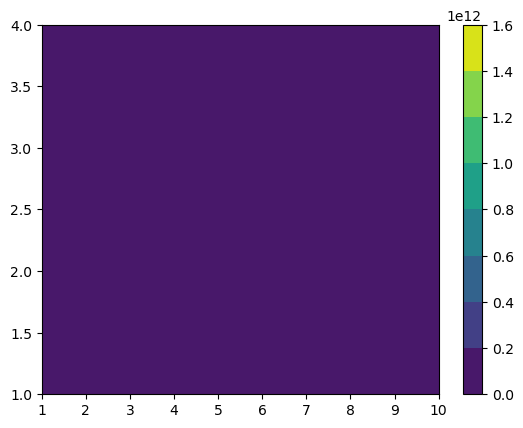

In [28]:
k = zeros(200,101)
ii = range(start = 1, stop = 100, length = 200)
jj = range(start = 1, stop = 10, length = 101)
for i in 1:length(ii)
    for j in 1:length(jj)
        k[i,j] = get_time_viscous(ii[i])/get_thickening_time(jj[j])
    end
    return k.*1e3
end
figure()
contourf(k.*1e3,color="viridis")
colorbar()
gca().set_xlim([1,10])
gca().set_ylim([1,4])
show()

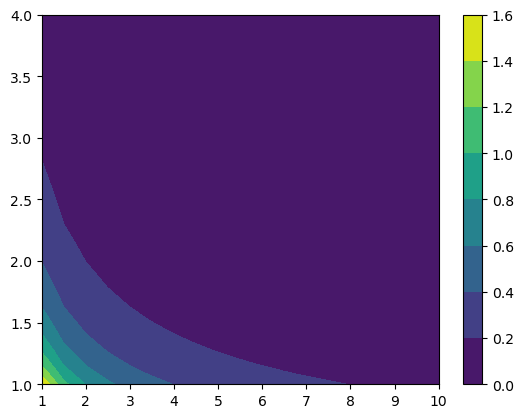

In [23]:
f(x,y) = get_time_viscous(x*1e3)/get_thickening_time(y*1e3)
x = range(start = 1, stop = 100, length = 200)
y = range(start = 1, stop = 10, length = 101)
z = @.f(x',y)

figure()
contourf(x,y,z,color=:viridis)
colorbar()
gca().set_xlim([1,10])
gca().set_ylim([1,4])
show()

In [24]:
z

101×200 Matrix{Float64}:
 1.58403    1.05779    0.794011    0.635529    …  0.0159195    0.0158403
 1.33325    0.890323   0.668303    0.534912       0.0133991    0.0133325
 1.13763    0.75969    0.570246    0.456427       0.0114331    0.0113763
 0.982101   0.655833   0.492288    0.394029       0.00987012   0.00982101
 0.856418   0.571903   0.429288    0.343603       0.008607     0.00856418
 0.753404   0.503112   0.377651    0.302273    …  0.00757171   0.00753404
 0.667917   0.446025   0.3348      0.267975       0.00671256   0.00667917
 0.596195   0.39813    0.298849    0.239199       0.00599176   0.00596195
 0.535435   0.357556   0.268392    0.214822       0.00538112   0.00535435
 0.483511   0.322882   0.242365    0.193989       0.00485929   0.00483511
 0.43879    0.293017   0.219948    0.176047    …  0.00440984   0.0043879
 0.399998   0.267113   0.200503    0.160483       0.00401998   0.00399998
 0.366131   0.244497   0.183527    0.146895       0.00367962   0.00366131
 ⋮               

In [25]:
k

200×101 Matrix{Float64}:
 1.58403e9  1.33325e9  1.13763e9  …       1.61293e7       1.58403e7
 1.05779e9  8.90323e8  7.5969e8           1.07709e7       1.05779e7
 7.94011e8  6.68303e8  5.70246e8          8.08498e6       7.94011e6
 6.35529e8  5.34912e8  4.56427e8          6.47124e6       6.35529e6
 5.29785e8  4.4591e8   3.80484e8          5.39452e6       5.29785e6
 4.54211e8  3.823e8    3.26207e8  …       4.62498e6       4.54211e6
 3.97506e8  3.34573e8  2.85483e8          4.04759e6       3.97506e6
 3.53388e8  2.9744e8   2.53798e8          3.59836e6       3.53388e6
 3.18085e8  2.67726e8  2.28444e8          3.23889e6       3.18085e6
 2.89195e8  2.43409e8  2.07695e8          2.94471e6       2.89195e6
 2.65115e8  2.23142e8  1.90402e8  …       2.69953e6       2.65115e6
 2.44738e8  2.05991e8  1.75767e8          2.49203e6       2.44738e6
 2.27269e8  1.91288e8  1.63221e8          2.31416e6       2.27269e6
 ⋮                                ⋱                       ⋮
 1.67573e7  1.41043e7  1.20349e

In [ ]:
# f(lambda,hice) = get_time_viscous(lambda*1e3)/get_thickening_time(hice*1e3)
# lambda = LinRange(1,100,200)
# hice = LinRange(1,10,101)
# z = @.f(lambda',hice)

# figure()
# contourf(lambda,hice,z,color=:viridis)
# colorbar()
# gca().set_xlim([1,10])
# gca().set_ylim([1,4])
# show()